In [28]:
import pandas as pd
import numpy as np
import os
from datetime import datetime as dt, timedelta
from dateutil.relativedelta import *
import re
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3

<h3>SQLite Handling functions</h3>
<p>Use Pandas to import dataframe into SQLlite</p>

In [2]:
DB = "hockey_dataMVP.db"

#SQL Handle functions
def run_query(q):
    with sqlite3.connect(DB) as conn:
        x = pd.read_sql(q,conn)
    return x
   
#send command
def run_command(c):
    with sqlite3.connect(DB) as conn:
        conn.isolation_level = None
        return conn.execute(c)
    
#show tables
def show_tables():
    r = """
    Select name,type
    FROM sqlite_master
    WHERE type in ("table","view");
        """
    return run_query(r)

In [3]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_validate as CV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [43]:
#import data
teamtraining = pd.read_csv('gametrainingdata.txt')
teamtraining.drop(columns=['Unnamed: 0','t1_wins','t1_loses','t1_ties','t1_otl',
                           't1_points','t1_total_games','t1_recent_wins', 't1_recent_loses', 't1_recent_ties',
                           't1_recent_otl','t1_recent_points','t2_wins','t2_loses','t2_ties','t2_otl',
                           't2_points','t2_total_games','t2_recent_wins', 't2_recent_loses', 't2_recent_ties',
                           't2_recent_otl','t2_recent_points'],axis=1,inplace=True)

#randomly pull test/training set (reserve 20% for test)
mask = np.random.rand(teamtraining.shape[0]) < 0.8

teamtrain = teamtraining[mask]

teamtest = teamtraining[~mask]

<h2>First look at opposing team shots</h2>

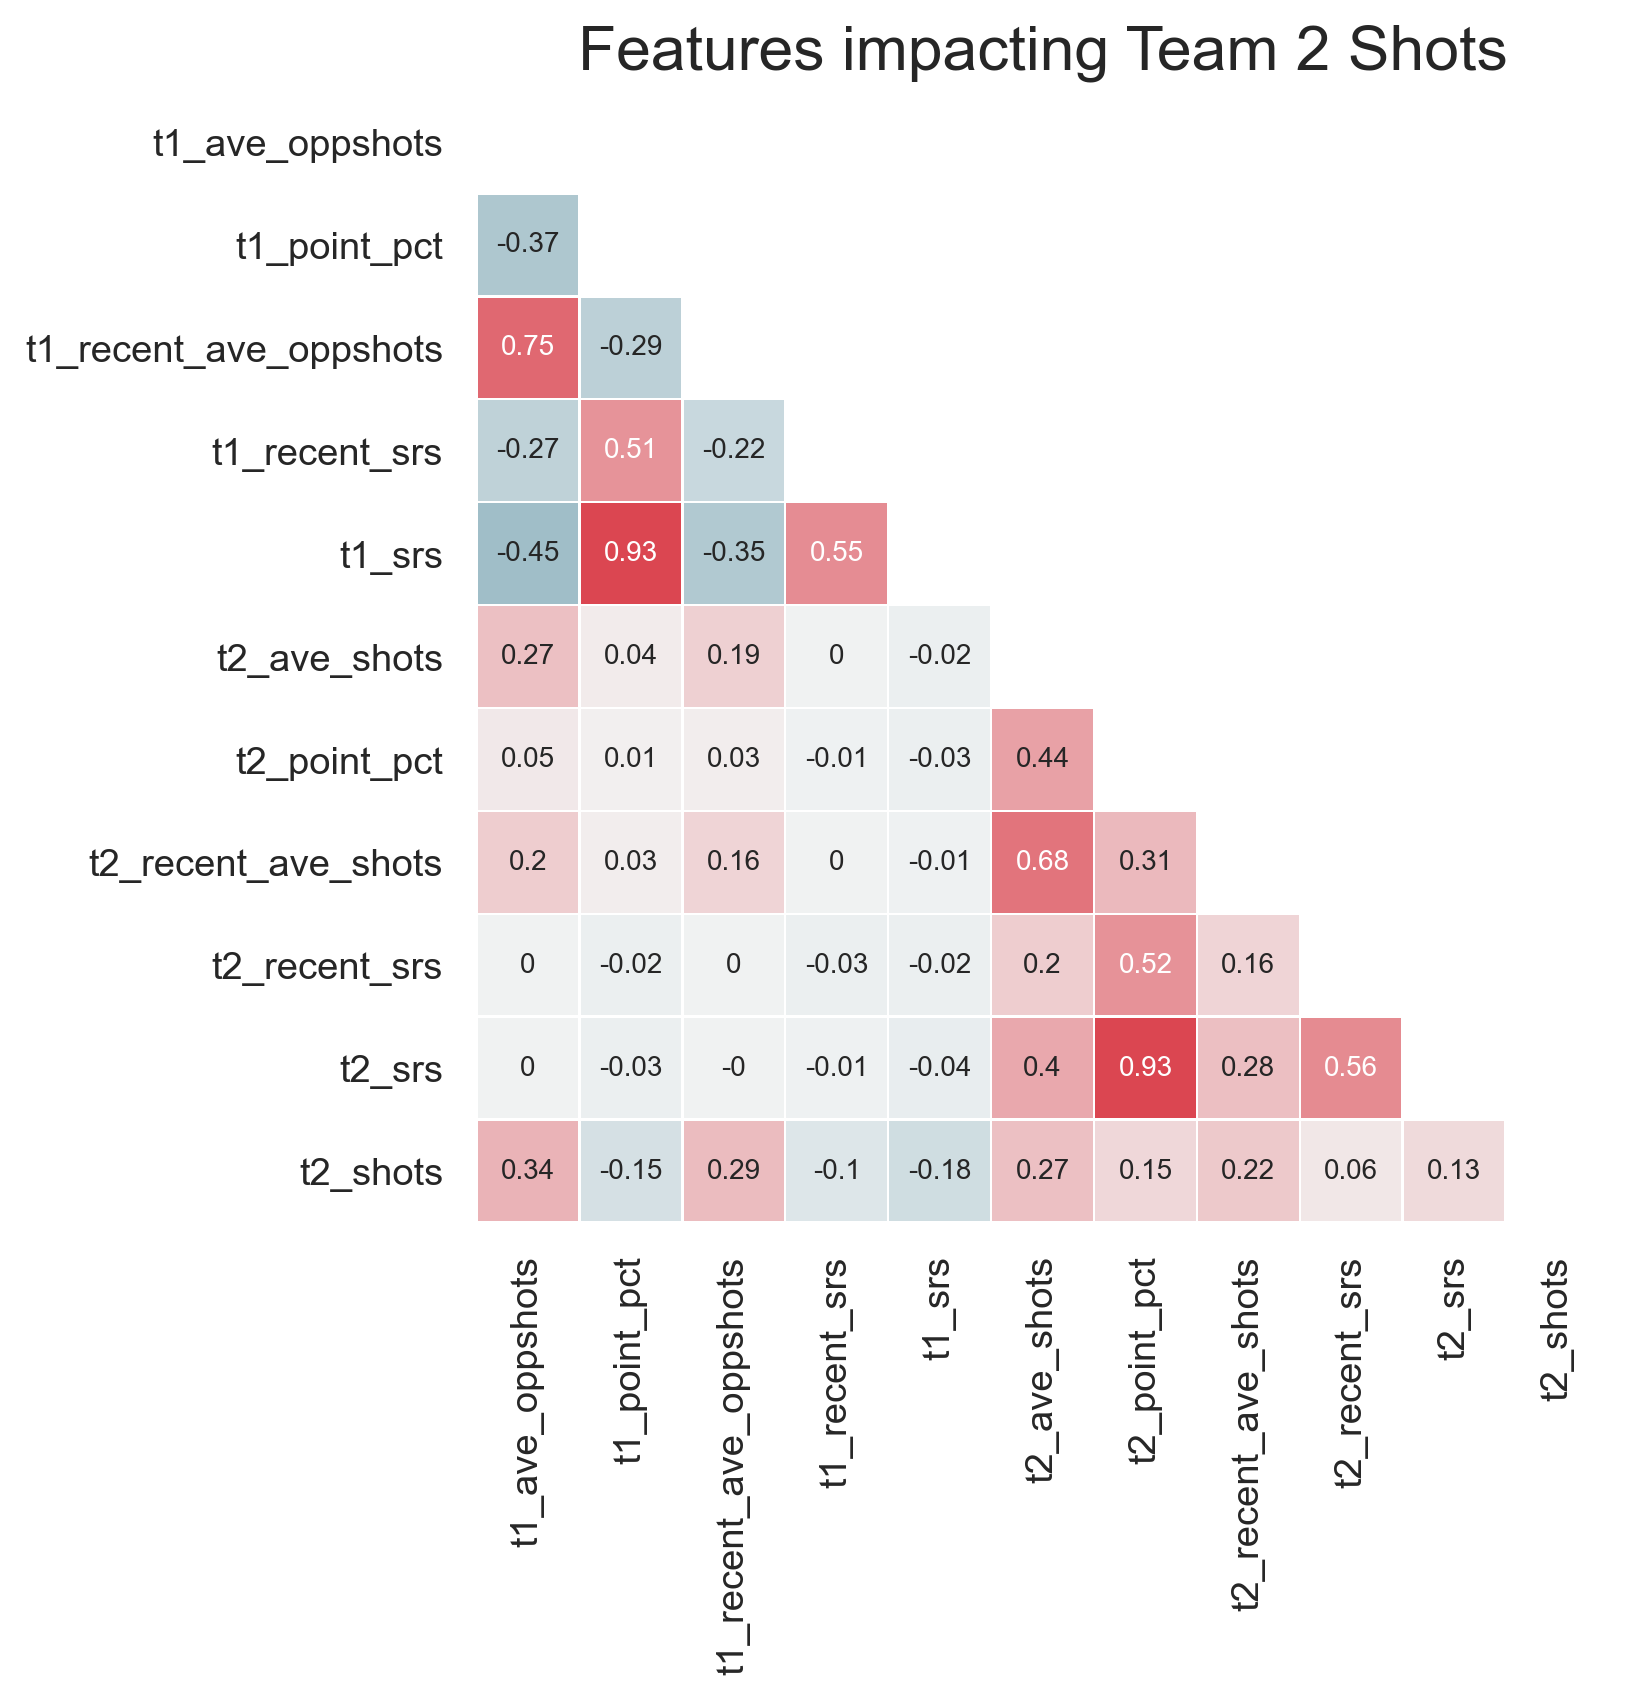

In [88]:
#add test data back for EDA
fig4 = plt.figure(figsize=(12,6),dpi=250)
sns.set(font_scale=1)
corr1 = np.round(teamtrain[['t1_ave_oppshots','t1_point_pct','t1_recent_ave_oppshots','t1_recent_srs',
                           't1_srs','t2_ave_shots','t2_point_pct','t2_recent_ave_shots','t2_recent_srs',
                           't2_srs','t2_shots']].corr(),2)
# Generate a mask for the upper triangle
npmask1 = np.triu(np.ones_like(teamtrain[['t1_ave_oppshots','t1_point_pct','t1_recent_ave_oppshots','t1_recent_srs',
                           't1_srs','t2_ave_shots','t2_point_pct','t2_recent_ave_shots','t2_recent_srs',
                           't2_srs','t2_shots']].corr(), dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1,mask=npmask1,annot=True,annot_kws={"size": 8},square=True,cmap=cmap,vmax=1, center=0,linewidths=.5,  cbar=False)
plt.title('Features Impacting The Opposing Team Shots',fontsize=18)
plt.gca().set_facecolor('white')

In [ ]:
#add test data back for EDA
fig4 = plt.figure(figsize=(12,6),dpi=250)
sns.set(font_scale=1)
corr1 = np.round(teamtrain[['t1_ave_oppshots','t1_point_pct','t1_recent_ave_oppshots','t1_recent_srs',
                           't1_srs','t2_ave_shots','t2_point_pct','t2_recent_ave_shots','t2_recent_srs',
                           't2_srs','t2_shots']].corr(),2)
# Generate a mask for the upper triangle
npmask1 = np.triu(np.ones_like(teamtrain[['t1_ave_oppshots','t1_point_pct','t1_recent_ave_oppshots','t1_recent_srs',
                           't1_srs','t2_ave_shots','t2_point_pct','t2_recent_ave_shots','t2_recent_srs',
                           't2_srs','t2_shots']].corr(), dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1,mask=npmask1,annot=True,annot_kws={"size": 8},square=True,cmap=cmap,vmax=1, center=0,linewidths=.5,  cbar=False)
plt.title('Features impacting Team 2 Shots',fontsize=18)
plt.gca().set_facecolor('white')